## InsightFace 3D Face Analysis 

In [ ]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

In [2]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.24.3


In [3]:
assert float('.'.join(insightface.__version__.split('.')[:2]))>=float('0.7')

In [10]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\hasna/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\hasna/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\hasna/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\hasna/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\hasna/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [17]:
swapper = insightface.model_zoo.get_model("C:\\Users\\hasna\\Downloads\\inswapper_128.onnx" ,
                                download=False,
                                download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


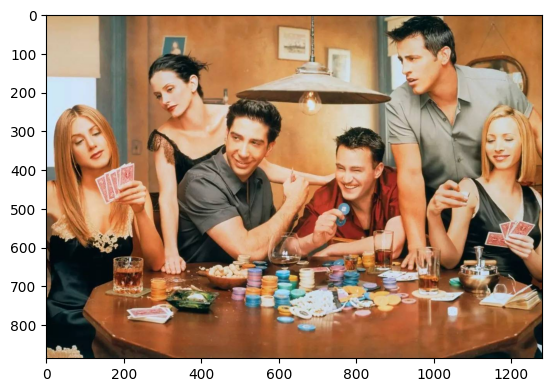

In [23]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

### Detecting the faces

 Using buffalo_l model

In [24]:
# Detected faces
faces = app.get(img)

C:\Users\hasna\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


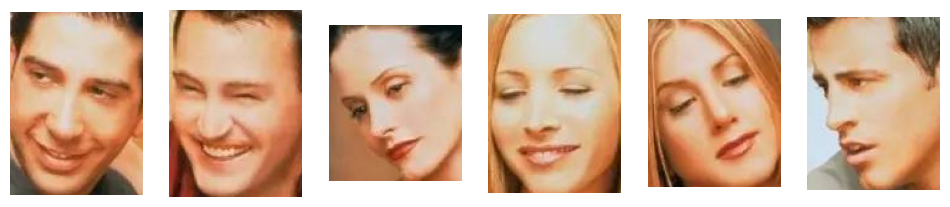

In [25]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')    

###  Face Swapping

In [48]:
# Sorts left to right
faces = sorted(faces, key = lambda x : x.bbox[0])
res = img.copy()
assert len(faces)==6 # Confirm 6 faces found
source_face = faces[0]

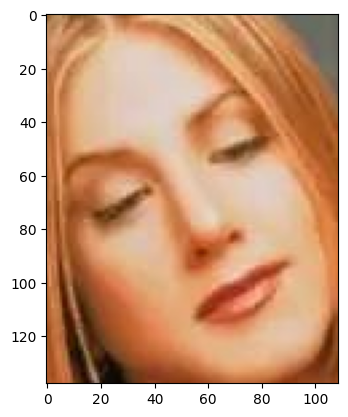

In [49]:
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [50]:
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

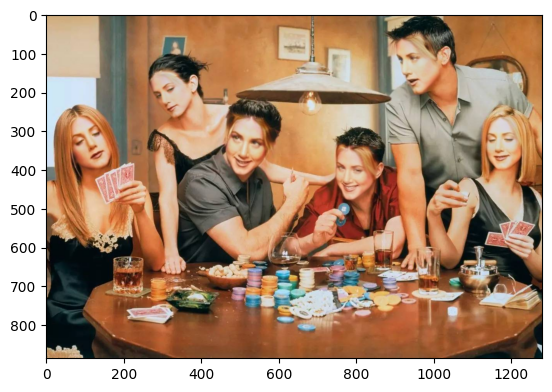

In [52]:
plt.imshow(res[:,:,::-1])
plt.show()

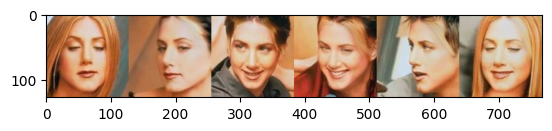

In [53]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)

plt.imshow(res[:,:,::-1])
plt.show()

### Put another face on it

In [55]:
 tov = cv2.imread('C:\\Users\\hasna\\Downloads\\Tovino-Thomas-759.jpg')

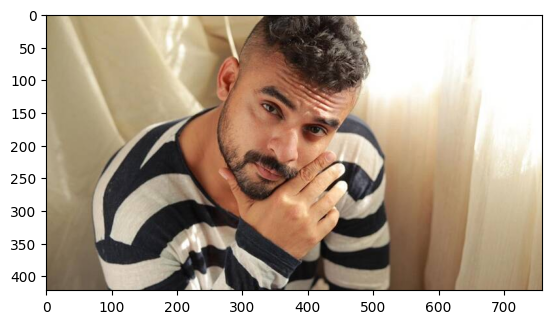

In [57]:
plt.imshow(tov[:,:,::-1])
plt.show()

### 1 Detect and save the Face of Tovino

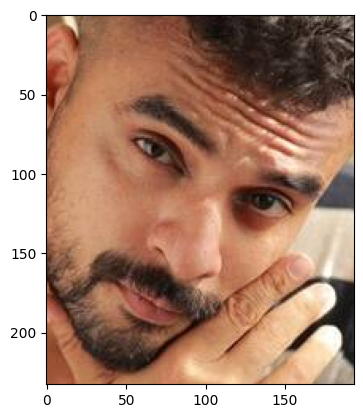

In [61]:
tov_faces = app.get(tov)
assert len(tov_faces) == 1
tov_face = tov_faces[0]
bbox = tov_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(tov[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

### 2.Detect Friend's faces

In [62]:
faces = app.get(img)

### 3. Swap Tovino's Face 

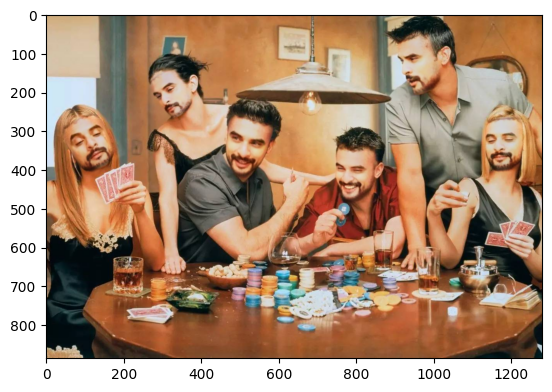

In [64]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)
plt.imshow(res[:,:,::-1])
plt.show() 

### Close up view

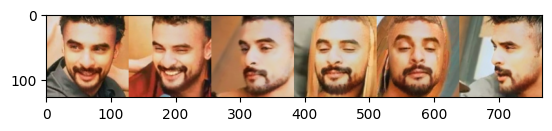

In [65]:
res = []
for face in faces:
    _img, _ = swapper.get(img,
                          face,
                          rob_face,
                          paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)

plt.imshow(res[:,:,::-1])
plt.show()

### Swap With Liverpool Players

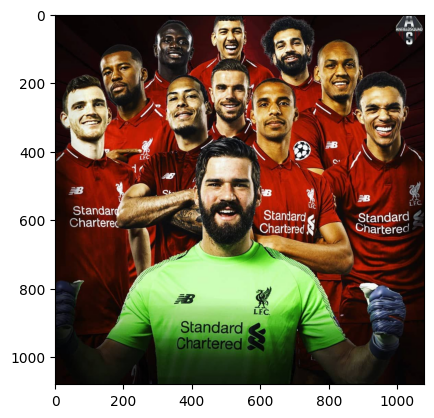

In [69]:
players = cv2.imread('C:\\Users\\hasna\\Downloads\\lfc.jpg')
plt.imshow(players[:,:,::-1])
plt.show()

In [70]:
faces = app.get(players)

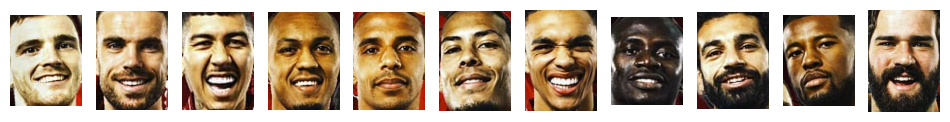

In [72]:
fig, axs = plt.subplots(1, 11, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(players[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')   

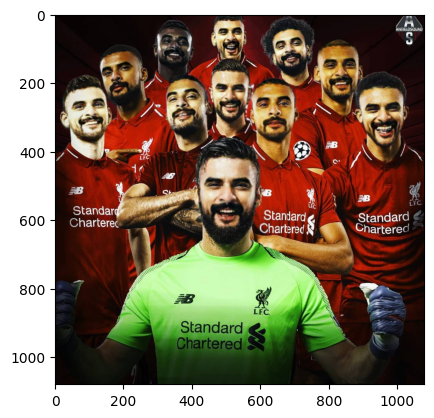

In [74]:
faces = app.get(players)
res = players.copy()
for face in faces:
    res = swapper.get(res, face, tov_face, paste_back=True)
plt.imshow(res[:,:,::-1])
plt.show() 

### Swap two faces

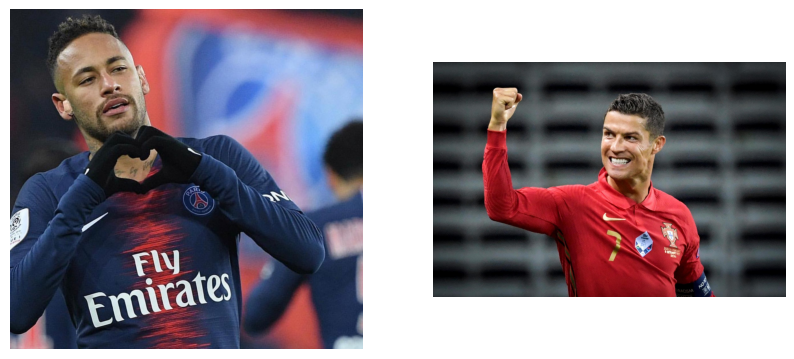

In [75]:
img1 = cv2.imread("C:\\Users\\hasna\\Downloads\\neymar.jpg")
img2 = cv2.imread("C:\\Users\\hasna\\Downloads\\cristiano-ronaldo.jpg")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1[:,:,::-1])
axs[0].axis('off')
axs[1].imshow(img2[:,:,::-1])
axs[1].axis('off')
plt.show()

In [76]:
face1 = app.get(img1)[0]
face2 = app.get(img2)[0]

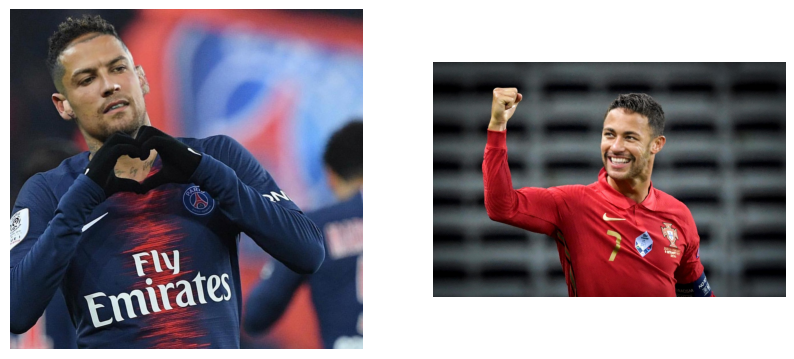

In [77]:
img1_ = img1.copy()
img2_ = img2.copy()
img1_ = swapper.get(img1_, face1, face2, paste_back=True)
img2_ = swapper.get(img2_, face2, face1, paste_back=True)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1_[:,:,::-1])
axs[0].axis('off')
axs[1].imshow(img2_[:,:,::-1])
axs[1].axis('off')
plt.show()